<a href="https://colab.research.google.com/github/gabrielfas/Spotify-Playlist-Analysis/blob/master/colab-notebooks/dual_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obtendo arquivos do Google Drive

In [0]:
!pip install -U -q PyDrive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

## Fazendo login no Google Cloud Platform

> O login é necessário para obter alguns arquivos que serão utilizados no decorrer do notebook.
Os arquivos estão disponíveis nessa pasta do Google Drive: [diversify-files](https://drive.google.com/drive/folders/1RNg99x6G_Mmh1smc3SrRz-Qk3PCj8Cys)<br/>
Eles serão baixados automaticamente na máquina virtual do google colaborative no código abaixo.



In [0]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
folder_id = '1RNg99x6G_Mmh1smc3SrRz-Qk3PCj8Cys'
folder = drive.ListFile({'q': "'{}' in parents and trashed=false".format(folder_id)})

file_list = folder.GetList()

for file in file_list:
    file.GetContentFile(file['title'])
    

## Instalando dependências

> Esse passo pode ser um pouco demorado devido à máquina virtual da google ser iniciada sem nenhum dos pacotes de visualização.

In [12]:
!pip install -r requirements.txt

    100% |████████████████████████████████| 14.7MB 1.4MB/s 
    100% |████████████████████████████████| 12.6MB 1.9MB/s 
    100% |████████████████████████████████| 12.1MB 2.6MB/s 
    100% |████████████████████████████████| 8.9MB 2.8MB/s 
    100% |████████████████████████████████| 204kB 25.3MB/s 
    100% |████████████████████████████████| 7.4MB 3.5MB/s 
    100% |████████████████████████████████| 952kB 12.2MB/s 
  Running setup.py bdist_wheel for bokeh ... - \ | / - \ | / - \ | / done
  Stored in directory: /root/.cache/pip/wheels/ff/28/51/22e8d08e9d5383ee1de981aaa8ff7bc53c7d65022e5101400f
  Running setup.py bdist_wheel for seaborn ... - done
  Stored in directory: /root/.cache/pip/wheels/fc/1c/74/c8f80a532c06a789599b8659b117ec7d7574cac4a06f7dabfe
  Running setup.py bdist_wheel for spotipy ... - done
  Stored in directory: /root/.cache/pip/wheels/76/28/19/a86ca9bb0e32dbd4a4f580870250f5aeef852870578e0427e6
  Running setup.py bdist_wheel for missingno ... -

# Pacotes utilizados

In [0]:
import pandas as pd
import numpy as np
import interfacespfy as isp
import altair as alt
import seaborn as sns
import bokeh as bkh
import missingno as msno
import matplotlib.pyplot as plt

In [14]:
import warnings
warnings.filterwarnings('ignore')

# Altair plots render by default in JupyterLab and nteract

# Uncomment/run this line to enable Altair in the classic notebook (not in JupyterLab)
# alt.renderers.enable('notebook')

# Uncomment/run this line to enable Altair in Colab
alt.renderers.enable('colab')

RendererRegistry.enable('colab')

## Fazendo login no spotify e baixando musicas salvas

In [15]:
spfy = isp.login_user('belzedu')
musics = isp.get_favorite_songs(spfy)



            User authentication requires interaction with your
            web browser. Once you enter your credentials and
            give authorization, you will be redirected to
            a url.  Paste that url you were directed to to
            complete the authorization.

        
Opened https://accounts.spotify.com/authorize?scope=playlist-modify-private+user-library-read&redirect_uri=http%3A%2F%2Flocalhost%2F&response_type=code&client_id=5d6d117598a94245a84a726981fa6e3b in your browser


Enter the URL you were redirected to: http://localhost/?code=AQC6IVBzRScdSaSmA78FH9U7YAkXneVOyTgfJ9KFZ3ZustmcmuiWCPwL-5Cr494vUnPI4ofP-c64nPb2uY9YFJ7TfdGKmHc4RimQK1Q8lTFJwsAr4FSrKNzNYeNm1-Bk3UUEinsiGaiJ8SeEYRyoeOHVNgupqO3wNMII79WAJPfsm9jyBEEQvFwTju_CABHhO4K4gf4sh9KR6I_XIrcFRpjloTDCNdZIdkdbUMqGd_GOd8C1pA




In [16]:
pdmusics = pd.DataFrame(musics)
pdmusics.set_index(['id'], inplace=True)
print("Quantidade de musicas baixadas:", pdmusics.shape[0])
pdmusics.head()

('Quantidade de musicas baixadas:', 564)


,album,album_id,artist,artist_id,duration_ms,name,popularity
id,,,,,,,
08JTB5hpXPCVPGJzic8E9e,Beautiful People Will Ruin Your Life (Extended...,7CPPcbdyAhAF1PEWCnm4DY,The Wombats,0Ya43ZKWHTKkAbkoJJkwIB,214432,Bee-Sting,42
7v9Ne4758aGFfFc5avh89h,"Proudly Present....A Guide To Love, Loss & Des...",75l5Bqvc0BH45UhJrS04Xj,The Wombats,0Ya43ZKWHTKkAbkoJJkwIB,191293,Let's Dance To Joy Division,65
4w9TBRGhvbhiLQB8jVCusl,Beautiful People Will Ruin Your Life,4kUbTSoTsbKP5MRdYMDBx1,The Wombats,0Ya43ZKWHTKkAbkoJJkwIB,219481,Cheetah Tongue,63
11IJA30efHAJLO3qroPh5L,Beautiful People Will Ruin Your Life,4kUbTSoTsbKP5MRdYMDBx1,The Wombats,0Ya43ZKWHTKkAbkoJJkwIB,207679,Turn,63
7GvkOFkNsM6Exnkyqeajqm,"Proudly Present....A Guide To Love, Loss & Des...",75l5Bqvc0BH45UhJrS04Xj,The Wombats,0Ya43ZKWHTKkAbkoJJkwIB,210560,Moving To New York,64


In [0]:
saved_songs_feat = isp.get_favorite_songs(spfy, features=True)
saved_songs_data = isp.get_favorite_songs(spfy)

## Descrição das colunas

- **acousticness**: Valor de 0 a 1 que indica se há som de audiência na música. Um valor de 1 indica maior certeza da presença de público na gravação e vice-versa.
- **danceability**: Valor de 0 a 1 que indica se a música é favorável para dançar de acordo com características musicais como setabilidade ritimica.
- Adicionar outras

In [25]:
df_ssongs = pd.DataFrame(saved_songs_feat)
print("Quantidade de musicas salvas:", df_ssongs.shape[0])
df_ssongs.head()

('Quantidade de musicas salvas:', 564)


,acousticness,danceability,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,0.045700,0.650,0.866,08JTB5hpXPCVPGJzic8E9e,0.000000,11,0.0682,-3.713,1,0.0343,115.001,0.717
1,0.001250,0.397,0.839,7v9Ne4758aGFfFc5avh89h,0.000000,4,0.5760,-6.674,1,0.1020,116.947,0.764
2,0.042600,0.533,0.967,4w9TBRGhvbhiLQB8jVCusl,0.000432,2,0.1320,-3.066,1,0.0570,95.008,0.603
3,0.007430,0.531,0.847,11IJA30efHAJLO3qroPh5L,0.000000,1,0.0916,-3.907,1,0.0529,105.030,0.380
4,0.000029,0.252,0.886,7GvkOFkNsM6Exnkyqeajqm,0.000005,9,0.2560,-4.678,0,0.0714,161.939,0.498


## Unindo os dados em um unico dataframe

In [26]:
df_ssongsdata = pd.DataFrame(saved_songs_data)
edu_songs = df_ssongsdata.merge(df_ssongs, how='left', on='id')
print("Exemplo de amostra apos juntar tabelas:")
edu_songs['user'] = 'edujtm'
edu_songs.iloc[1].T

Exemplo de amostra apos juntar tabelas:


album               Proudly Present....A Guide To Love, Loss & Des...
album_id                                       75l5Bqvc0BH45UhJrS04Xj
artist                                                    The Wombats
artist_id                                      0Ya43ZKWHTKkAbkoJJkwIB
duration_ms                                                    191293
id                                             7v9Ne4758aGFfFc5avh89h
name                                      Let's Dance To Joy Division
popularity                                                         65
acousticness                                                  0.00125
danceability                                                    0.397
energy                                                          0.839
instrumentalness                                                    0
key                                                                 4
liveness                                                        0.576
loudness            

## Lendo as playlists do Gabriel

In [27]:
#gabriel_mfeat = isp.get_user_playlists(spfy, '12144777067', features=True)
#gabriel_mdata = isp.get_user_playlists(spfy, '12144777067')alt
gabriel_songs = pd.read_csv('gabriel_playlists.csv')
print("Quantidade de musicas:", gabriel_songs.shape[0])
gabriel_songs['user'] = 'gfeli'
gabriel_songs.iloc[1].T

('Quantidade de musicas:', 5936)


Unnamed: 0                               2
acousticness                       0.00591
danceability                         0.398
energy                               0.939
id                  5hheGdf1cb4rK0FNiedCfK
instrumentalness                  0.000881
key                                      9
liveness                             0.357
loudness                            -2.865
mode                                     0
speechiness                         0.0648
tempo                               92.027
valence                              0.235
duration_ms                         342821
name                        The Devil In I
popularity                              70
user                                 gfeli
Name: 1, dtype: object

In [28]:
## Unindo os dataframes de ambos os usuários
all_songs = edu_songs.append(gabriel_songs[:564])
all_songs.shape[0]

1128

## Rápida análise integridade dos dados após unir as tabelas

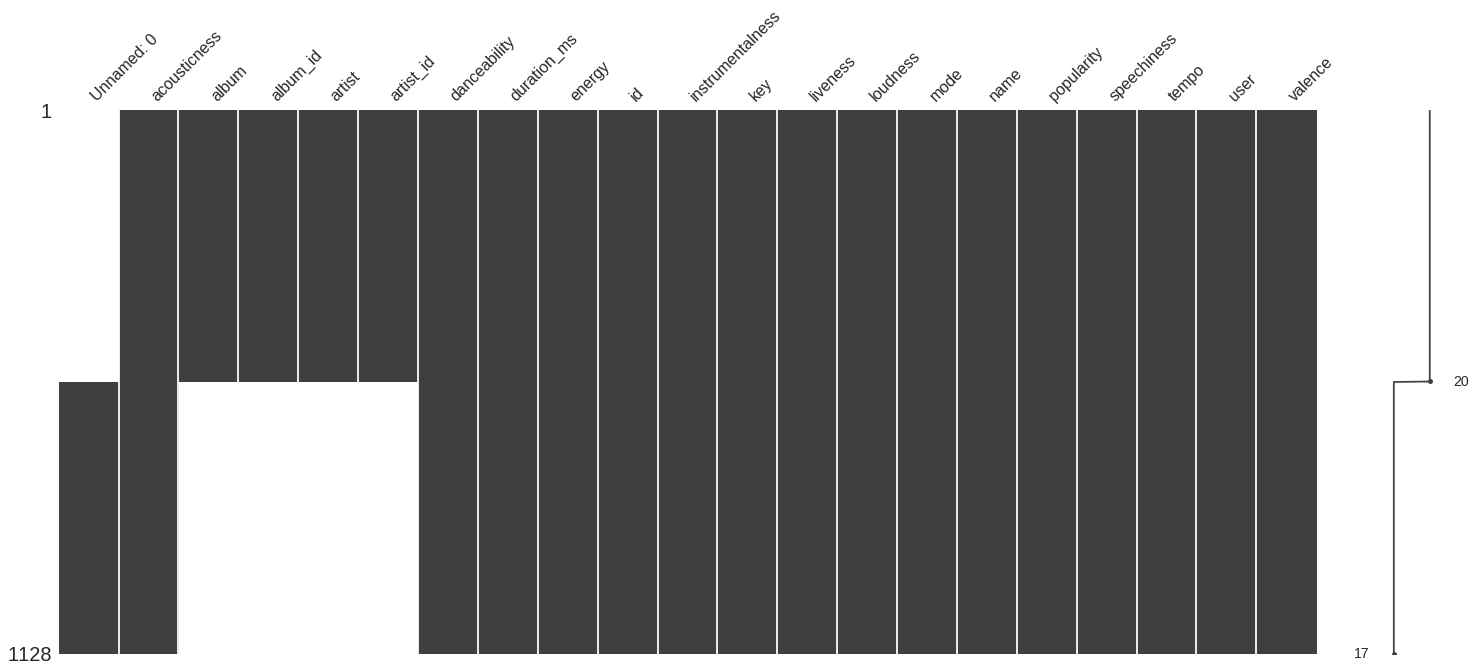

In [29]:
_ = msno.matrix(all_songs)

# Buscando similaridades e diferenças significativas entre os dados

> O objetivo desta análise é encontrar possíveis diferenças entre os dados de ambos os dataframes que podem representar diferenças entre os
> gostos musicais de cada usuário. Tentaremos observar isso graficamente utilizando as bibliotecas do python.

In [0]:
def plot_similarities(data, variables):
    root = int(np.ceil(np.sqrt(len(variables))))
    fig, axis = plt.subplots(nrows=root, ncols=root, figsize=(15, 15))
    
    numeric_categories = ["0.0 - 0.2",
                           "0.2 - 0.4",
                           "0.4 - 0.6",
                           "0.6 - 0.8",
                           "0.8 - 1.0",
                           ]
    fig.suptitle('Comparando distribuicoes para as caracteristicas das musicas')
    for idx, column in enumerate(variables):
        i, j = idx % root, idx // root
        ax = axis[j][i]
        
        grouped = data.groupby('user')[[column, 'user']]
        
        for user, group in grouped:
            # pd.qcut(group[column].rank(method='first'), len(numeric_categories), numeric_categories)
            sns.distplot(group[column], ax=ax, label=user)
        ax.legend()
    plt.show()

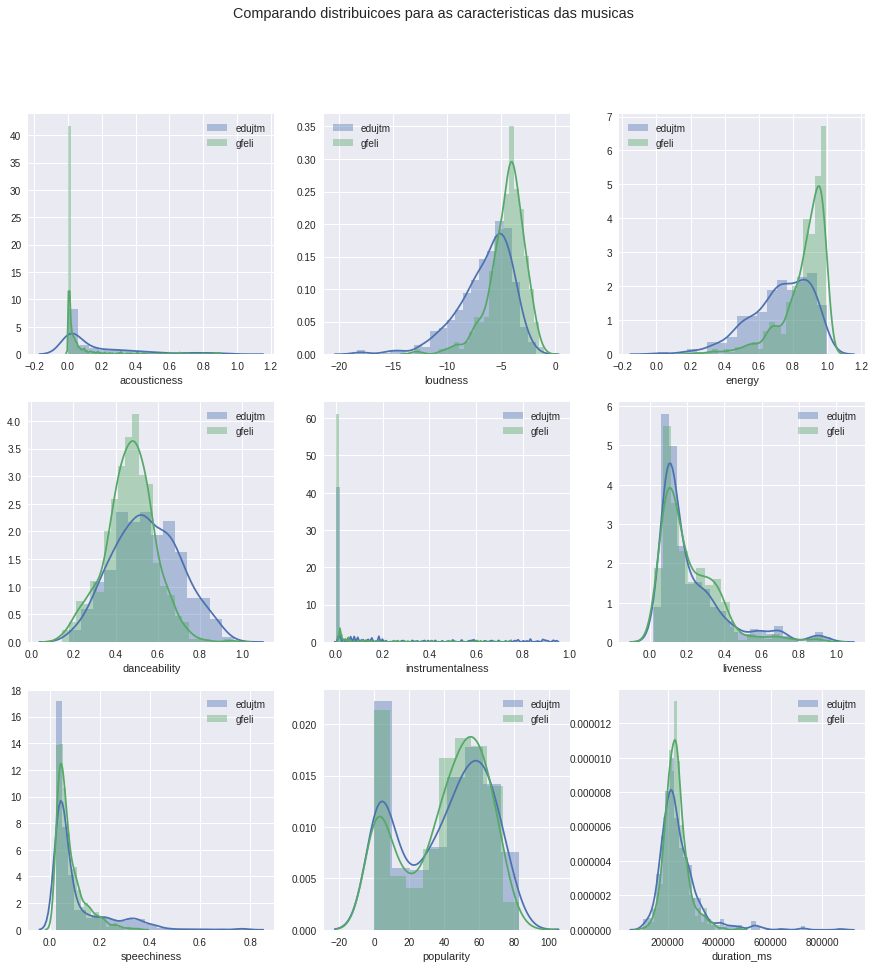

In [39]:
warnings.filterwarnings('ignore')
variables = ['acousticness', 'loudness', 'energy', 'danceability', 'instrumentalness', 'liveness', 'speechiness', 'popularity', 'duration_ms']
plot_similarities(all_songs, variables)

In [41]:
interval = alt.selection_interval()

data = alt.Chart(all_songs).mark_point().encode(
    x='instrumentalness',
    y='loudness',
    tooltip=['name', 'popularity'],
    color=alt.condition(interval, 'user:N', alt.value('lightgray')),
).properties(
    selection=interval
)

popularity = alt.Chart(all_songs).mark_bar(opacity=0.5).encode(
    x=alt.X('popularity', bin=True),
    y='count()',
    color='user'
).transform_filter(
    interval
)

data | popularity

HConcatChart({
  hconcat: [Chart({
    data:      Unnamed: 0  acousticness  \
    0           NaN      0.045700   
    1           NaN      0.001250   
    2           NaN      0.042600   
    3           NaN      0.007430   
    4           NaN      0.000029   
    5           NaN      0.005790   
    6           NaN      0.001260   
    7           NaN      0.294000   
    8           NaN      0.358000   
    9           NaN      0.069600   
    10          NaN      0.317000   
    11          NaN      0.454000   
    12          NaN      0.181000   
    13          NaN      0.131000   
    14          NaN      0.852000   
    15          NaN      0.710000   
    16          NaN      0.236000   
    17          NaN      0.142000   
    18          NaN      0.217000   
    19          NaN      0.986000   
    20          NaN      0.106000   
    21          NaN      0.011900   
    22          NaN      0.680000   
    23          NaN      0.362000   
    24          NaN      0.465000   
    25          NaN      0.431000   
    26          NaN      0.198000   
    27          NaN      0.889000   
    28          NaN      0.244000   
    29          NaN      0.073300   
    ..          ...           ...   
    534      1274.0      0.052500   
    535      1276.0      0.000144   
    536      1278.0      0.000470   
    537      1280.0      0.008800   
    538      1282.0      0.000181   
    539      1284.0      0.092700   
    540      1289.0      0.002990   
    541      1291.0      0.002660   
    542      1293.0      0.000091   
    543      1295.0      0.002310   
    544      1297.0      0.000439   
    545      1299.0      0.002760   
    546      1301.0      0.000448   
    547      1303.0      0.002620   
    548      1305.0      0.000221   
    549      1307.0      0.000237   
    550      1309.0      0.000369   
    551      1310.0      0.000254   
    552      1312.0      0.000950   
    553      1314.0      0.000097   
    554      1316.0      0.004030   
    555      1317.0      0.002400   
    556      1318.0      0.011800   
    557      1319.0      0.262000   
    558      1321.0      0.000127   
    559      1323.0      0.000488   
    560      1325.0      0.000495   
    561      1326.0      0.001600   
    562      1327.0      0.000006   
    563      1330.0      0.024100   
    
                                                     album  \
    0    Beautiful People Will Ruin Your Life (Extended...   
    1    Proudly Present....A Guide To Love, Loss & Des...   
    2                 Beautiful People Will Ruin Your Life   
    3                 Beautiful People Will Ruin Your Life   
    4    Proudly Present....A Guide To Love, Loss & Des...   
    5                                           Glitterbug   
    6                                     Shoot The Runner   
    7                                             Currents   
    8                                             Currents   
    9                                             Currents   
    10                                                Ares   
    11                                          effloresce   
    12                Big Boi Presents... Got Purp? Vol. 2   
    13                                            Diaspora   
    14                                              Jungle   
    15                                              Jungle   
    16                                              Jungle   
    17                                              Jungle   
    18                                            For Ever   
    19                                            For Ever   
    20                                            For Ever   
    21                                            For Ever   
    22                                            For Ever   
    23                                            For Ever   
    24                                            For Ever   
    25                                          